# Data Understanding

Data yang digunakan dalam analisis ini berasal dari dataset [Indonesia Tourism Destination](https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination?select=tourism_rating.csv) yang dapat diunduh di Kaggle.

## Install & Load Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

## Loading data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
tourism_rating = pd.read_csv("/content/drive/MyDrive/Proyek 2/tourism_rating.csv")
tourism_with_id = pd.read_csv("/content/drive/MyDrive/Proyek 2/tourism_with_id.csv")
user_data = pd.read_csv("/content/drive/MyDrive/Proyek 2/user.csv")

# Data Preparation

## Drop Unused Column

In [4]:
tourism_with_id.isnull().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

Pada tahap ini fitur yang tidak digunakan dalam analisis yaitu kolom Unnamed: 11 dan Unnamed: 12 akan di drop dari analisis. Selain itu kolom Time_Minutes juga di drop karena terlalu banyak nilai hilang.

In [5]:
tourism_with_id = tourism_with_id.drop(['Time_Minutes','Unnamed: 11','Unnamed: 12'], axis = 1)

In [6]:
tourism_rating.isnull().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [7]:
user_data.isnull().sum()

User_Id     0
Location    0
Age         0
dtype: int64

# Data Preprocessing

## Merge dataset

### Merge dataset destinasi wisata dengan rating

In [8]:
destination_rating = pd.merge(tourism_rating, tourism_with_id[['Place_Id']], how='right', on='Place_Id')
destination_rating

,User_Id,Place_Id,Place_Ratings
0,36,1,4
1,38,1,2
2,64,1,2
3,74,1,2
4,86,1,4
...,...,...,...
9995,284,437,5
9996,288,437,1
9997,288,437,4
9998,297,437,4


### Merge rating dengan user

In [9]:
user_rating = pd.merge(user_data, destination_rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
user_rating

,User_Id,Location,Age
83,1,"Semarang, Jawa Tengah",20
18,2,"Bekasi, Jawa Barat",21
345,3,"Cirebon, Jawa Barat",23
62,4,"Bekasi, Jawa Barat",21
63,5,"Lampung, Sumatera Selatan",20
...,...,...,...
130,296,"Lampung, Sumatera Selatan",31
153,297,"Palembang, Sumatera Selatan",39
323,298,"Bogor, Jawa Barat",38
182,299,"Sragen, Jawa Tengah",27


# EDA

In [10]:
destination_rating.head()

,User_Id,Place_Id,Place_Ratings
0,36,1,4
1,38,1,2
2,64,1,2
3,74,1,2
4,86,1,4


In [11]:
tourism_with_id.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134


In [12]:
user_rating.head()

,User_Id,Location,Age
83,1,"Semarang, Jawa Tengah",20
18,2,"Bekasi, Jawa Barat",21
345,3,"Cirebon, Jawa Barat",23
62,4,"Bekasi, Jawa Barat",21
63,5,"Lampung, Sumatera Selatan",20


In [13]:
print('Jumlah destinasi wisata: ', len(tourism_with_id.Place_Id.unique()))
print('Jumlah rating: ', len(tourism_rating))
print('Jumlah pengguna: ', len(user_data.User_Id.unique()))

Jumlah destinasi wisata:  437
Jumlah rating:  10000
Jumlah pengguna:  300


### Variabel destinasi wisata

In [14]:
tourism_with_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     437 non-null    int64  
 1   Place_Name   437 non-null    object 
 2   Description  437 non-null    object 
 3   Category     437 non-null    object 
 4   City         437 non-null    object 
 5   Price        437 non-null    int64  
 6   Rating       437 non-null    float64
 7   Coordinate   437 non-null    object 
 8   Lat          437 non-null    float64
 9   Long         437 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 34.3+ KB


In [15]:
tourism_with_id['Category'] = tourism_with_id['Category'].replace('Taman Hiburan','Taman_Hiburan')
tourism_with_id['Category'] = tourism_with_id['Category'].replace('Cagar Alam','Cagar_Alam')
tourism_with_id['Category'] = tourism_with_id['Category'].replace('Pusat Perbelanjaan','Pusat_Perbelanjaan')
tourism_with_id['Category'] = tourism_with_id['Category'].replace('Tempat Ibadah','Tempat_Ibadah')

In [16]:
print('Jumlah destinasi wisata: ', len(tourism_with_id.Place_Id.unique()))
print('Jumlah kategori: ', len(tourism_with_id.Category.unique()))
print('Jenis kategori: ', tourism_with_id.Category.unique())
print('Jumlah kota destinasi wisata: ', len(tourism_with_id.City.unique()))
print('Daftar kota destinasi wisata: ', tourism_with_id.City.unique())

Jumlah destinasi wisata:  437
Jumlah kategori:  6
Jenis kategori:  ['Budaya' 'Taman_Hiburan' 'Cagar_Alam' 'Bahari' 'Pusat_Perbelanjaan'
 'Tempat_Ibadah']
Jumlah kota destinasi wisata:  5
Daftar kota destinasi wisata:  ['Jakarta' 'Yogyakarta' 'Bandung' 'Semarang' 'Surabaya']


In [17]:
tourism_with_id.describe()

,Place_Id,Price,Rating,Lat,Long
count,437.000000,437.000000,437.000000,437.000000,437.000000
mean,219.000000,24652.173913,4.442792,-7.095438,109.160142
std,126.295289,66446.374709,0.208587,0.727241,1.962848
min,1.000000,0.000000,3.400000,-8.197894,103.931398
25%,110.000000,0.000000,4.300000,-7.749590,107.578369
50%,219.000000,5000.000000,4.500000,-7.020524,110.237468
75%,328.000000,20000.000000,4.600000,-6.829411,110.431869
max,437.000000,900000.000000,5.000000,1.078880,112.821662


### Variabel Rating

In [18]:
tourism_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [19]:
tourism_rating.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


### Variabel Pengguna

In [20]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [21]:
user_data.describe()

,User_Id,Age
count,300.000000,300.000000
mean,150.500000,28.700000
std,86.746758,6.393716
min,1.000000,18.000000
25%,75.750000,24.000000
50%,150.500000,29.000000
75%,225.250000,34.000000
max,300.000000,40.000000


## Visualisasi data

### Daerah dengan jumlah tempat wisata terbanyak

Text(0.5, 1.0, 'Distribution of tourism destination across 5 cities')

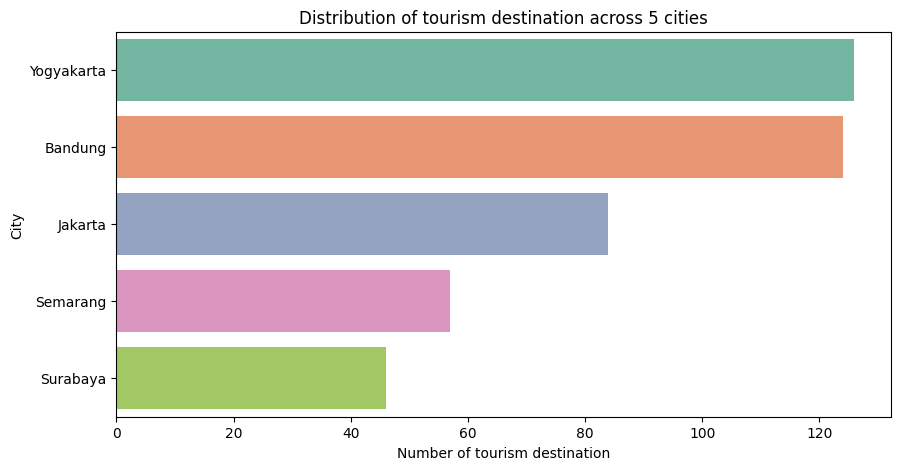

In [22]:
fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(data=tourism_with_id, y='City', order=tourism_with_id.City.value_counts().index, palette='Set2')
plt.xlabel('Number of tourism destination')
plt.ylabel('City')
plt.title("Distribution of tourism destination across 5 cities")

### Jumlah tempat wisata menurut kategori

Text(0.5, 1.0, 'Distribution of tourism destination by category')

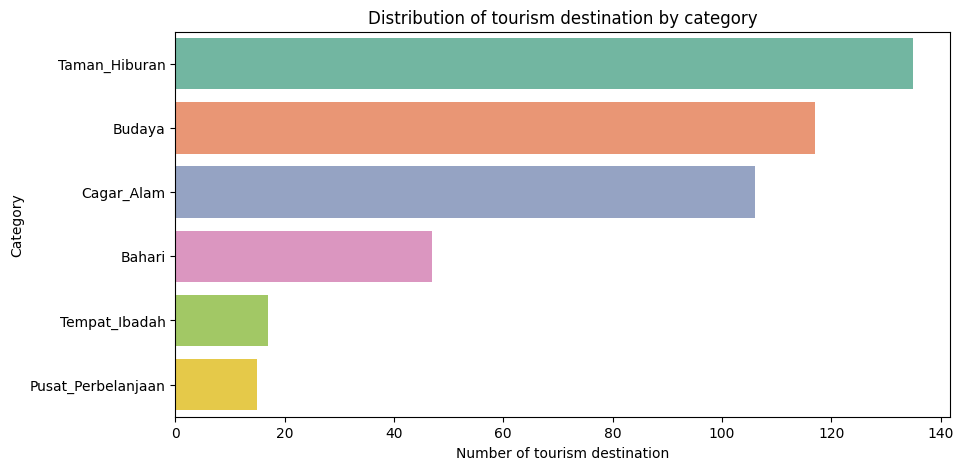

In [23]:
fig, ax = plt.subplots(figsize=(10,5))

sns.countplot(data=tourism_with_id, y='Category', order=tourism_with_id.Category.value_counts().index, palette='Set2')
plt.xlabel('Number of tourism destination')
plt.ylabel('Category')
plt.title("Distribution of tourism destination by category")

In [24]:
tourism_with_id.Category.value_counts()

Taman_Hiburan         135
Budaya                117
Cagar_Alam            106
Bahari                 47
Tempat_Ibadah          17
Pusat_Perbelanjaan     15
Name: Category, dtype: int64

### Tempat wisata dengan rating terbanyak

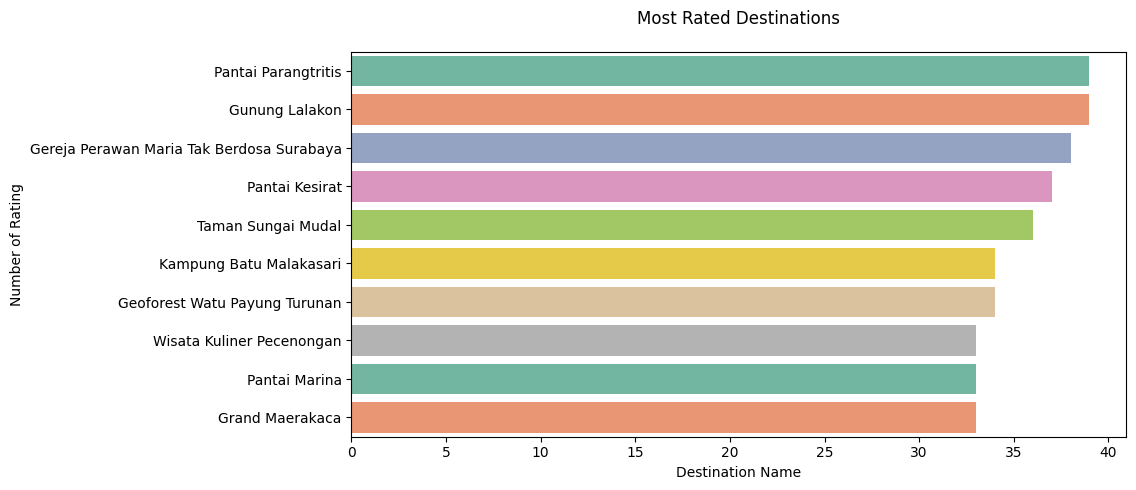

In [25]:
top_rated = destination_rating['Place_Id'].value_counts().reset_index()[0:10]
top_rated = pd.merge(top_rated, tourism_with_id[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')

plt.figure(figsize=(10,5))
sns.barplot(x='Place_Id_x', y='Place_Name', data=top_rated, palette='Set2')
plt.title('Most Rated Destinations', pad=20)
plt.ylabel('Number of Rating')
plt.xlabel('Destination Name')
plt.show()

### Tempat wisata dengan rata-rata rating tertinggi

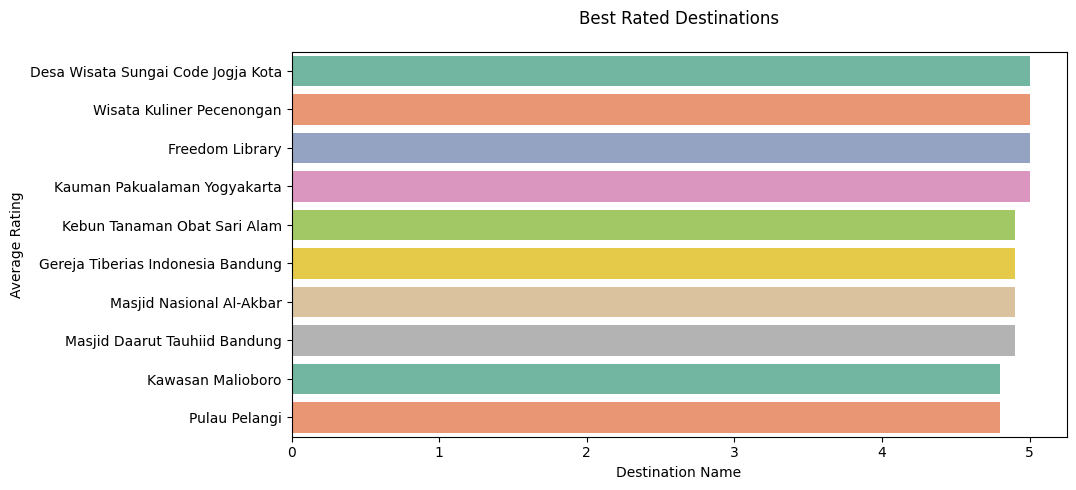

In [26]:
highest_rated = tourism_with_id.groupby('Place_Name').Rating.mean().sort_values(ascending=False)[0:10].reset_index(name="Rating")

plt.figure(figsize=(10,5))
sns.barplot(x='Rating', y='Place_Name', data=highest_rated, palette='Set2')
plt.title('Best Rated Destinations', pad=20)
plt.ylabel('Average Rating')
plt.xlabel('Destination Name')
plt.show()

### Tempat wisata dengan harga tiket masuk termahal & termurah

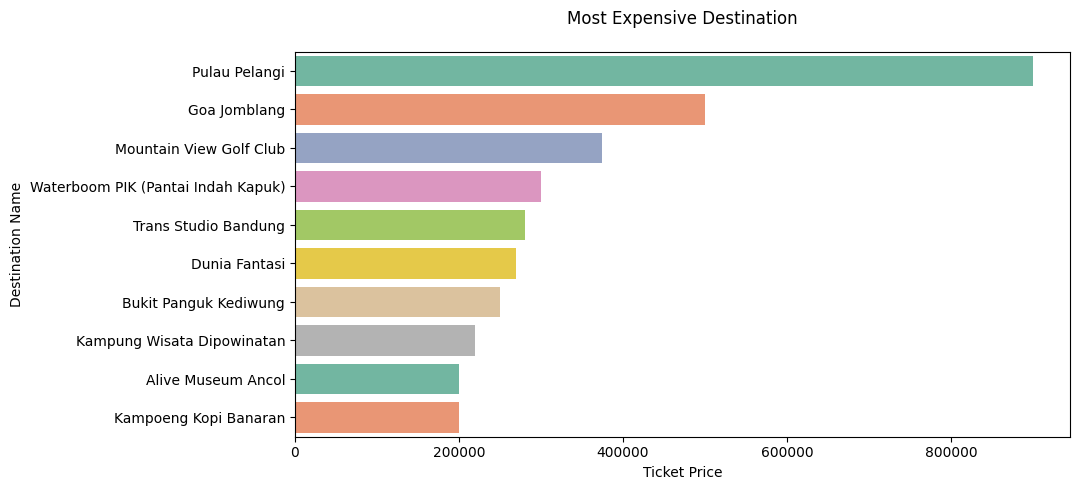

In [27]:
expensive = tourism_with_id.nlargest(10, 'Price')

plt.figure(figsize=(10,5))
sns.barplot(y=expensive['Place_Name'], x=expensive['Price'], data=expensive, palette='Set2')
plt.title('Most Expensive Destination', pad=20)
plt.ylabel('Destination Name')
plt.xlabel('Ticket Price')
plt.show()

### Daerah dengan jumlah pengguna terbanyak

Text(0.5, 1.0, 'Number of Users by City')

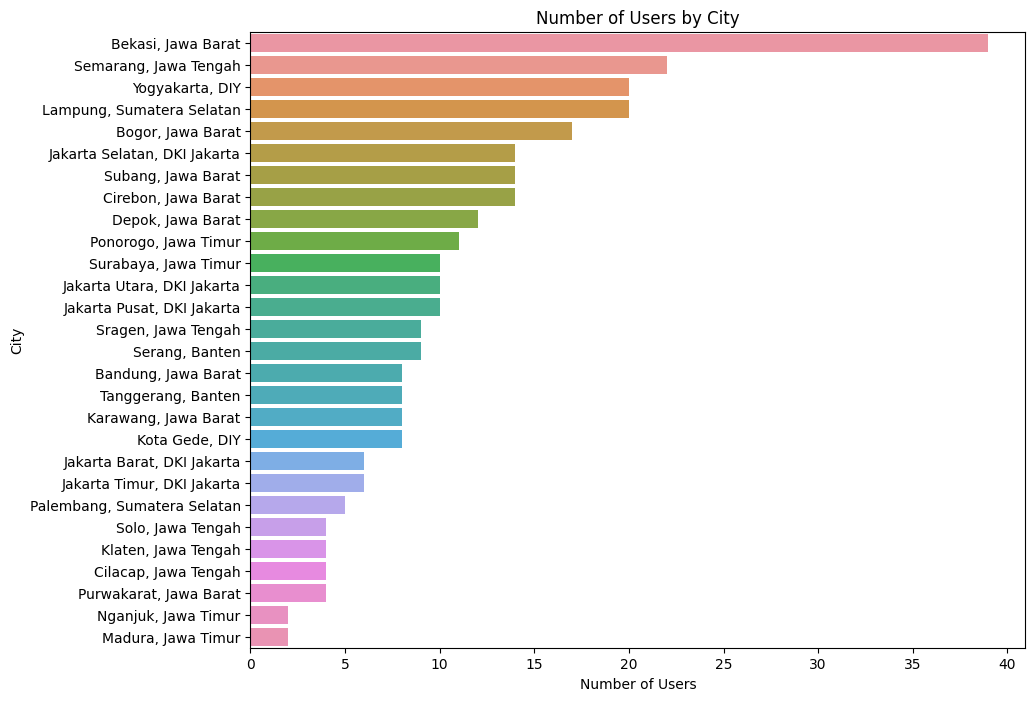

In [28]:
fig, ax = plt.subplots(figsize=(10,8))

sns.countplot(data=user_data, y='Location', order=user_data.Location.value_counts().index)
plt.xlabel('Number of Users')
plt.ylabel('City')
plt.title("Number of Users by City")

### Distribusi usia pengguna

Text(0.5, 1.0, 'Number of User by Age')

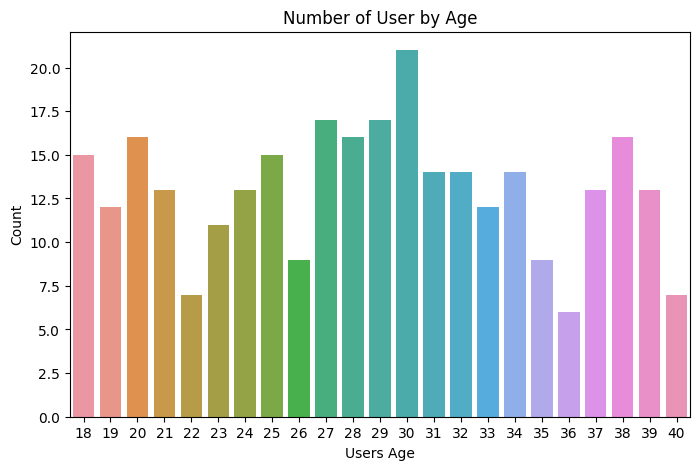

In [29]:
fig, ax = plt.subplots(figsize=(8,5))

sns.countplot(data=user_data, x='Age')
plt.xlabel('Users Age')
plt.ylabel('Count')
plt.title("Number of User by Age")

# Modeling

## Content Based Filtering

### TF-IDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer()

tf_idf.fit(tourism_with_id['Category'])

tf_idf.get_feature_names_out()

array(['bahari', 'budaya', 'cagar_alam', 'pusat_perbelanjaan',
       'taman_hiburan', 'tempat_ibadah'], dtype=object)

In [31]:
tfidf_matrix = tf_idf.fit_transform(tourism_with_id['Category'])
tfidf_matrix.shape

(437, 6)

In [32]:
tfidf_matrix.todense()

matrix([[0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]])

In [33]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf_idf.get_feature_names_out(),
    index=tourism_with_id.Place_Name
).sample(10, axis=0)

,bahari,budaya,cagar_alam,pusat_perbelanjaan,taman_hiburan,tempat_ibadah
Place_Name,,,,,,
Pantai Ngrenehan,1.0,0.0,0.0,0.0,0.0,0.0
Stone Garden Citatah,0.0,0.0,0.0,0.0,1.0,0.0
Air Terjun Kedung Pedut,0.0,0.0,1.0,0.0,0.0,0.0
Margasatwa Muara Angke,0.0,0.0,1.0,0.0,0.0,0.0
Bandros City Tour,0.0,1.0,0.0,0.0,0.0,0.0
Taman Vanda,0.0,0.0,0.0,0.0,1.0,0.0
Istana Negara Republik Indonesia,0.0,1.0,0.0,0.0,0.0,0.0
Curug Cipanas,0.0,0.0,1.0,0.0,0.0,0.0
Pantai Congot,1.0,0.0,0.0,0.0,0.0,0.0


### Cosine similarity

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

cosine = cosine_similarity(tfidf_matrix)
cosine

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [35]:
cosine_sim = pd.DataFrame(
    cosine, index=tourism_with_id.Place_Name, columns=tourism_with_id.Place_Name)
print('Shape:', cosine_sim.shape)

cosine_sim.sample(10, axis=0)

Shape: (437, 437)


Place_Name,Monumen Nasional,Kota Tua,Dunia Fantasi,Taman Mini Indonesia Indah (TMII),Atlantis Water Adventure,Taman Impian Jaya Ancol,Kebun Binatang Ragunan,Ocean Ecopark,Pelabuhan Marina,Pulau Tidung,...,Monumen Bambu Runcing Surabaya,House of Sampoerna,Atlantis Land Surabaya,Taman Hiburan Rakyat,Taman Mundu,Museum Mpu Tantular,Taman Bungkul,Taman Air Mancur Menari Kenjeran,Taman Flora Bratang Surabaya,Gereja Perawan Maria Tak Berdosa Surabaya
Place_Name,,,,,,,,,,,,,,,,,,,,,
Tugu Muda Semarang,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Pantai Watu Kodok,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mall Thamrin City,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Pulau Bidadari,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Museum Bank Indonesia,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Wisata Lereng Kelir,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Patung Sura dan Buaya,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Gereja Katedral,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Sam Poo Kong Temple,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Implementasi sistem rekomendasi

In [36]:
def destination_recommendations(place_name, similarity_data=cosine_sim, items=tourism_with_id[['Place_Name', 'City', 'Category']], k=10):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(place_name, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [37]:
place_name = 'Monumen Nasional'
tourism_with_id[tourism_with_id.Place_Name.eq(place_name)]

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153


In [38]:
destination_recommendations(place_name)

,Place_Name,City,Category
0,Bandros City Tour,Bandung,Budaya
1,Saung Angklung Mang Udjo,Bandung,Budaya
2,Museum Satria Mandala,Jakarta,Budaya
3,Keraton Yogyakarta,Yogyakarta,Budaya
4,Museum Benteng Vredeburg Yogyakarta,Yogyakarta,Budaya
5,Candi Sewu,Yogyakarta,Budaya
6,Kyotoku Floating Market,Bandung,Budaya
7,Museum Nike Ardilla,Bandung,Budaya
8,Taman Budaya Yogyakarta,Yogyakarta,Budaya
9,Kampung Wisata Sosro Menduran,Yogyakarta,Budaya


In [39]:
place_name = 'Pantai Cipta'
tourism_with_id[tourism_with_id.Place_Name.eq(place_name)]

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
349,350,Pantai Cipta,Pantai Cipta juga dikenal sebagai Pantai Petik...,Bahari,Semarang,5000,4.0,"{'lat': -6.9486402, 'lng': 110.4102923}",-6.94864,110.410292


In [40]:
destination_recommendations(place_name)

,Place_Name,City,Category
0,Pantai Pok Tunggal,Yogyakarta,Bahari
1,Pantai Nguluran,Yogyakarta,Bahari
2,Pantai Samas,Yogyakarta,Bahari
3,Pantai Drini,Yogyakarta,Bahari
4,Pantai Sadranan,Yogyakarta,Bahari
5,Pantai Jungwok,Yogyakarta,Bahari
6,Pantai Wediombo,Yogyakarta,Bahari
7,Pantai Goa Cemara,Yogyakarta,Bahari
8,Pantai Timang,Yogyakarta,Bahari
9,Pantai Ngrenehan,Yogyakarta,Bahari


In [41]:
place_name = 'Hutan Bambu Keputih'
tourism_with_id[tourism_with_id.Place_Name.eq(place_name)]

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long
399,400,Hutan Bambu Keputih,Surabaya menjadi kota metropolitan kedua setel...,Cagar_Alam,Surabaya,0,4.3,"{'lat': -7.294190899999999, 'lng': 112.8017238}",-7.294191,112.801724


In [42]:
destination_recommendations(place_name)

,Place_Name,City,Category
0,Tebing Karaton,Bandung,Cagar_Alam
1,Situ Cileunca,Bandung,Cagar_Alam
2,Sunrise Point Cukul,Bandung,Cagar_Alam
3,Lereng Anteng Panoramic Coffee Place,Bandung,Cagar_Alam
4,The Lodge Maribaya,Bandung,Cagar_Alam
5,Observatorium Bosscha,Bandung,Cagar_Alam
6,Taman Bunga Cihideung,Bandung,Cagar_Alam
7,Perkebunan Teh Malabar,Bandung,Cagar_Alam
8,Sungai Palayangan,Bandung,Cagar_Alam
9,Babakan Siliwangi City Forest Path Bandung,Bandung,Cagar_Alam


### Evaluasi model

Dari hasil pemodelan dapat dilihat akurasi 100% untuk beberapa percobaan yang dilakukan, dengan kategori rekomendasi yang sesuai.

## Collaborative Filtering

### Data understanding

In [43]:
data = destination_rating.copy()

In [44]:
data

,User_Id,Place_Id,Place_Ratings
0,36,1,4
1,38,1,2
2,64,1,2
3,74,1,2
4,86,1,4
...,...,...,...
9995,284,437,5
9996,288,437,1
9997,288,437,4
9998,297,437,4


### Data preparation

#### Mengubah User_Id menjadi list tanpa nilai duplikat

In [45]:
user_ids = data['User_Id'].unique().tolist()
print('list User ID : ', user_ids)

list User ID :  [36, 38, 64, 74, 86, 100, 105, 118, 159, 162, 167, 169, 187, 189, 227, 235, 254, 265, 2, 17, 30, 43, 46, 56, 57, 59, 75, 94, 98, 110, 134, 137, 154, 160, 175, 188, 203, 217, 231, 292, 295, 55, 97, 185, 190, 206, 220, 240, 242, 255, 267, 280, 285, 4, 5, 6, 26, 53, 91, 108, 111, 113, 127, 143, 150, 171, 205, 247, 276, 288, 290, 1, 11, 12, 35, 87, 92, 103, 106, 109, 116, 120, 139, 179, 183, 212, 222, 226, 232, 238, 23, 31, 65, 68, 81, 90, 95, 104, 129, 156, 161, 170, 182, 184, 258, 264, 294, 296, 78, 101, 107, 123, 126, 142, 146, 148, 164, 196, 201, 250, 277, 278, 297, 14, 18, 33, 47, 50, 112, 181, 195, 248, 253, 259, 262, 271, 299, 300, 15, 19, 20, 61, 117, 124, 140, 211, 237, 269, 281, 121, 122, 136, 174, 283, 135, 149, 194, 213, 223, 249, 263, 279, 282, 10, 79, 88, 198, 216, 245, 7, 52, 58, 83, 125, 130, 168, 239, 25, 44, 119, 151, 202, 204, 229, 251, 63, 71, 93, 131, 147, 244, 256, 298, 28, 34, 51, 54, 153, 177, 197, 266, 286, 3, 22, 152, 155, 186, 215, 234, 236, 270, 

#### Melakukan encoding User_Id

In [46]:
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user ID : ', user_to_user_encoded)

encoded user ID :  {36: 0, 38: 1, 64: 2, 74: 3, 86: 4, 100: 5, 105: 6, 118: 7, 159: 8, 162: 9, 167: 10, 169: 11, 187: 12, 189: 13, 227: 14, 235: 15, 254: 16, 265: 17, 2: 18, 17: 19, 30: 20, 43: 21, 46: 22, 56: 23, 57: 24, 59: 25, 75: 26, 94: 27, 98: 28, 110: 29, 134: 30, 137: 31, 154: 32, 160: 33, 175: 34, 188: 35, 203: 36, 217: 37, 231: 38, 292: 39, 295: 40, 55: 41, 97: 42, 185: 43, 190: 44, 206: 45, 220: 46, 240: 47, 242: 48, 255: 49, 267: 50, 280: 51, 285: 52, 4: 53, 5: 54, 6: 55, 26: 56, 53: 57, 91: 58, 108: 59, 111: 60, 113: 61, 127: 62, 143: 63, 150: 64, 171: 65, 205: 66, 247: 67, 276: 68, 288: 69, 290: 70, 1: 71, 11: 72, 12: 73, 35: 74, 87: 75, 92: 76, 103: 77, 106: 78, 109: 79, 116: 80, 120: 81, 139: 82, 179: 83, 183: 84, 212: 85, 222: 86, 226: 87, 232: 88, 238: 89, 23: 90, 31: 91, 65: 92, 68: 93, 81: 94, 90: 95, 95: 96, 104: 97, 129: 98, 156: 99, 161: 100, 170: 101, 182: 102, 184: 103, 258: 104, 264: 105, 294: 106, 296: 107, 78: 108, 101: 109, 107: 110, 123: 111, 126: 112, 142

#### Encoding angka ke User ID

In [47]:
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user ID: ', user_encoded_to_user)

encoded angka ke user ID:  {0: 36, 1: 38, 2: 64, 3: 74, 4: 86, 5: 100, 6: 105, 7: 118, 8: 159, 9: 162, 10: 167, 11: 169, 12: 187, 13: 189, 14: 227, 15: 235, 16: 254, 17: 265, 18: 2, 19: 17, 20: 30, 21: 43, 22: 46, 23: 56, 24: 57, 25: 59, 26: 75, 27: 94, 28: 98, 29: 110, 30: 134, 31: 137, 32: 154, 33: 160, 34: 175, 35: 188, 36: 203, 37: 217, 38: 231, 39: 292, 40: 295, 41: 55, 42: 97, 43: 185, 44: 190, 45: 206, 46: 220, 47: 240, 48: 242, 49: 255, 50: 267, 51: 280, 52: 285, 53: 4, 54: 5, 55: 6, 56: 26, 57: 53, 58: 91, 59: 108, 60: 111, 61: 113, 62: 127, 63: 143, 64: 150, 65: 171, 66: 205, 67: 247, 68: 276, 69: 288, 70: 290, 71: 1, 72: 11, 73: 12, 74: 35, 75: 87, 76: 92, 77: 103, 78: 106, 79: 109, 80: 116, 81: 120, 82: 139, 83: 179, 84: 183, 85: 212, 86: 222, 87: 226, 88: 232, 89: 238, 90: 23, 91: 31, 92: 65, 93: 68, 94: 81, 95: 90, 96: 95, 97: 104, 98: 129, 99: 156, 100: 161, 101: 170, 102: 182, 103: 184, 104: 258, 105: 264, 106: 294, 107: 296, 108: 78, 109: 101, 110: 107, 111: 123, 112: 

#### Mengubah Place Id menjadi list tanpa duplikat

In [48]:
destination_ids = data['Place_Id'].unique().tolist()

#### Melakukan encoding Place_Id

In [49]:
destination_to_destination_encoded = {x: i for i, x in enumerate(destination_ids)}

#### Encoding angka ke Place ID

In [50]:
destination_encoded_to_destination = {i: x for i, x in enumerate(destination_ids)}

#### Petakan user id dan place id ke dataframe yang berkaitan

In [51]:
data['user'] = data['User_Id'].map(user_to_user_encoded)
data['destination'] = data['Place_Id'].map(destination_to_destination_encoded)

#### Cek data

In [52]:
num_users = len(user_to_user_encoded)
print(num_users)

300


In [53]:
num_destination = len(destination_encoded_to_destination)
print(num_destination)

437


In [54]:
data['rating'] = data['Place_Ratings'].values.astype(np.float32)

In [55]:
min_rating = min(data['rating'])

In [56]:
max_rating = max(data['rating'])

In [57]:
print('Number of User: {}, Number of Destination: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_destination, min_rating, max_rating
))

Number of User: 300, Number of Destination: 437, Min Rating: 1.0, Max Rating: 5.0


#### Membagi data untuk training dan validasi

In [58]:
data = data.sample(frac=1, random_state=50)
data

,User_Id,Place_Id,Place_Ratings,user,destination,rating
9102,198,399,4,166,398,4.0
7868,75,344,3,26,343,3.0
4176,281,183,2,148,182,2.0
4161,130,183,4,174,182,4.0
8770,173,383,2,227,382,2.0
...,...,...,...,...,...,...
8262,151,362,5,180,361,5.0
6214,56,273,2,23,272,2.0
8324,261,365,2,231,364,2.0
6253,209,274,1,278,273,1.0


#### Membuat variabel x untuk mencocokkan data user dan destinasi wisata

In [59]:
x = data[['user','destination']].values

#### Membuat variabel y untuk membuat rating dari hasil

In [60]:
y = data['rating'].apply(lambda x: (x-min_rating) / (max_rating-min_rating)).values

#### Membagi data menjadi 80% data train dan 20% data validasi

In [61]:
train_indices = int(0.8 * data.shape[0])

x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[166 398]
 [ 26 343]
 [148 182]
 ...
 [231 364]
 [278 273]
 [  8 245]] [0.75 0.5  0.25 ... 0.25 0.   0.  ]


### Training model

In [62]:
class RecommenderNet(tf.keras.Model):

  def __init__(self, num_users, num_destination, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_destination = num_destination
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.destination_embedding = layers.Embedding(
        num_destination,
        embedding_size,
        embeddings_initializer='he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.destination_bias = layers.Embedding(num_destination, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    destination_vector = self.destination_embedding(inputs[:, 1])
    destination_bias = self.destination_bias(inputs[:, 1])

    dot_user_destination = tf.tensordot(user_vector, destination_vector, 2)

    x = dot_user_destination + user_bias + destination_bias

    return tf.nn.sigmoid(x)

#### Compile model

In [63]:
model = RecommenderNet(num_users, num_destination, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

#### Memulai training

In [64]:
history = model.fit(
    x = x_train,
    y = y_train,
    #batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
250/250 [==============================] - 5s 8ms/step - loss: 0.6970 - root_mean_squared_error: 0.3470 - val_loss: 0.6977 - val_root_mean_squared_error: 0.3521
Epoch 2/100
250/250 [==============================] - 2s 6ms/step - loss: 0.6971 - root_mean_squared_error: 0.3470 - val_loss: 0.6970 - val_root_mean_squared_error: 0.3516
Epoch 3/100
250/250 [==============================] - 2s 8ms/step - loss: 0.6961 - root_mean_squared_error: 0.3464 - val_loss: 0.6978 - val_root_mean_squared_error: 0.3522
Epoch 4/100
250/250 [==============================] - 2s 8ms/step - loss: 0.6945 - root_mean_squared_error: 0.3451 - val_loss: 0.6969 - val_root_mean_squared_error: 0.3516
Epoch 5/100
250/250 [==============================] - 2s 8ms/step - loss: 0.6948 - root_mean_squared_error: 0.3453 - val_loss: 0.6968 - val_root_mean_squared_error: 0.3515
Epoch 6/100
250/250 [==============================] - 3s 11ms/step - loss: 0.6907 - root_mean_squared_error: 0.3424 - val_loss: 0.6983

#### Visualisasi metrik training

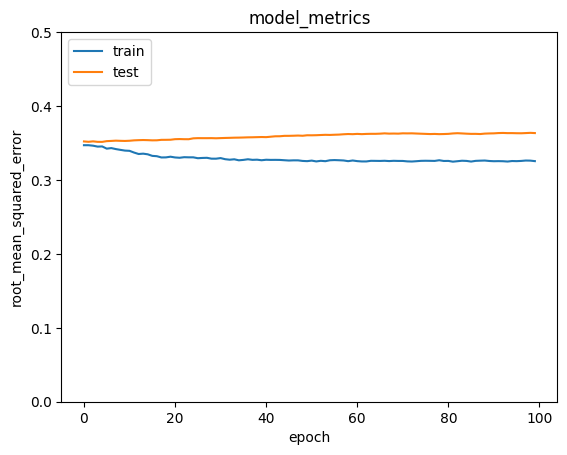

In [65]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.5)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [66]:
model = RecommenderNet(num_users, num_destination, 50)

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.MeanAbsoluteError()]
)

In [67]:
history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.7002 - mean_absolute_error: 0.2997 - val_loss: 0.6981 - val_mean_absolute_error: 0.3040
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6966 - mean_absolute_error: 0.2975 - val_loss: 0.6976 - val_mean_absolute_error: 0.3036
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6953 - mean_absolute_error: 0.2965 - val_loss: 0.6956 - val_mean_absolute_error: 0.3025
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6944 - mean_absolute_error: 0.2959 - val_loss: 0.6957 - val_mean_absolute_error: 0.3024
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6943 - mean_absolute_error: 0.2965 - val_loss: 0.6954 - val_mean_absolute_error: 0.3026
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.6917 - mean_absolute_error: 0.2949 - val_loss: 0.6968 - val_mean_absolute_error: 0.3036
Epoch 7/10

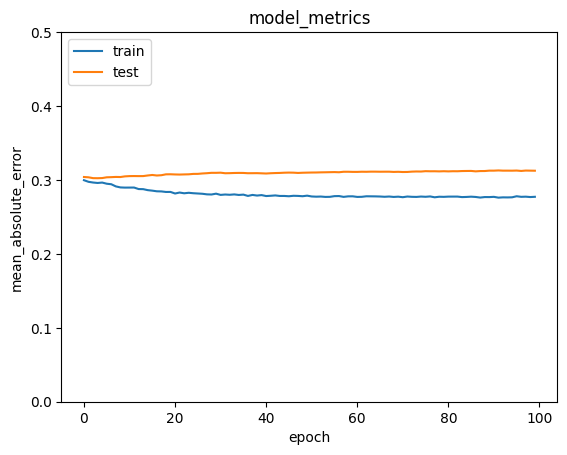

In [68]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model_metrics')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.5)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Mendapatkan rekomendasi destinasi wisata

#### Menyiapkan dataframe untuk hasil rekomendasi

In [69]:
destination_data = tourism_with_id[['Place_Id','Place_Name','City','Category','Rating','Price']]
destination_data.columns = ['id','place_name','city','category','rating','price']
df = destination_rating.copy()

#### Mengambil contoh user untuk menampilkan rekomendasi

In [70]:
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

#### Mengambil tempat yang belum dikunjungi oleh user

In [71]:
place_not_visited = destination_data[~destination_data['id'].isin(place_visited_by_user.Place_Id.values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(destination_to_destination_encoded.keys()))
)

place_not_visited = [[destination_to_destination_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

#### Menampilkan destinasi untuk user

In [72]:
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-7:][::-1]
recommended_place_ids = [
    destination_encoded_to_destination.get(place_not_visited[x][0]) for x in top_ratings_indices
]

print('Daftar rekomendasi destinasi wisata untuk: {}'.format('User ' + str(user_id)))
print('===' * 15,'\n')
print('----' * 15)
print('Tempat dengan rating wisata paling tinggi dari user')
print('----' * 15)

top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

place_df_rows = destination_data[destination_data['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category)

print('')
print('----' * 15)
print('7 Rekomendasi tempat wisata teratas')
print('----' * 15)

recommended_place = destination_data[destination_data['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,8)):
    print(i,'.', row.place_name, '\n    ', row.city, ',', row.category, ',', 'Harga Tiket Masuk ', row.price, ',', 'Rating Wisata ', row.rating,'\n')

print('==='*15)

13/13 [==============================] - 0s 2ms/step
Daftar rekomendasi destinasi wisata untuk: User 273

------------------------------------------------------------
Tempat dengan rating wisata paling tinggi dari user
------------------------------------------------------------
Selasar Sunaryo Art Space : Taman_Hiburan
Tektona Waterpark : Taman_Hiburan
Museum Pendidikan Nasional : Budaya
Museum Nike Ardilla : Budaya
Museum TNI AL Loka Jala Crana : Budaya

------------------------------------------------------------
7 Rekomendasi tempat wisata teratas
------------------------------------------------------------
1 . Air Terjun Kedung Pedut 
     Yogyakarta , Cagar_Alam , Harga Tiket Masuk  20000 , Rating Wisata  4.5 

2 . Puncak Gunung Api Purba - Nglanggeran 
     Yogyakarta , Cagar_Alam , Harga Tiket Masuk  10000 , Rating Wisata  4.7 

3 . Pantai Baron 
     Yogyakarta , Bahari , Harga Tiket Masuk  10000 , Rating Wisata  4.4 

4 . Pantai Congot 
     Yogyakarta , Bahari , Harga Tiket 